<a href="https://colab.research.google.com/github/JHBlack/UGA_Hacks_2023/blob/main/UGA_ML_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')


In [9]:
df = fetch_california_housing(as_frame=True).frame

In [10]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


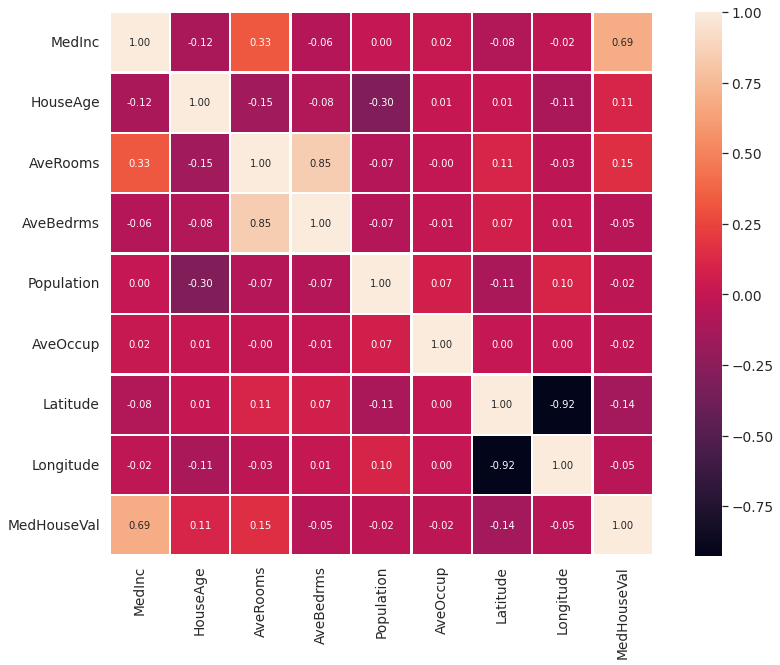

In [13]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.25)
sns.heatmap(df.corr(), linewidths=1.5, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=df.columns, xticklabels=df.columns)
plt.show()

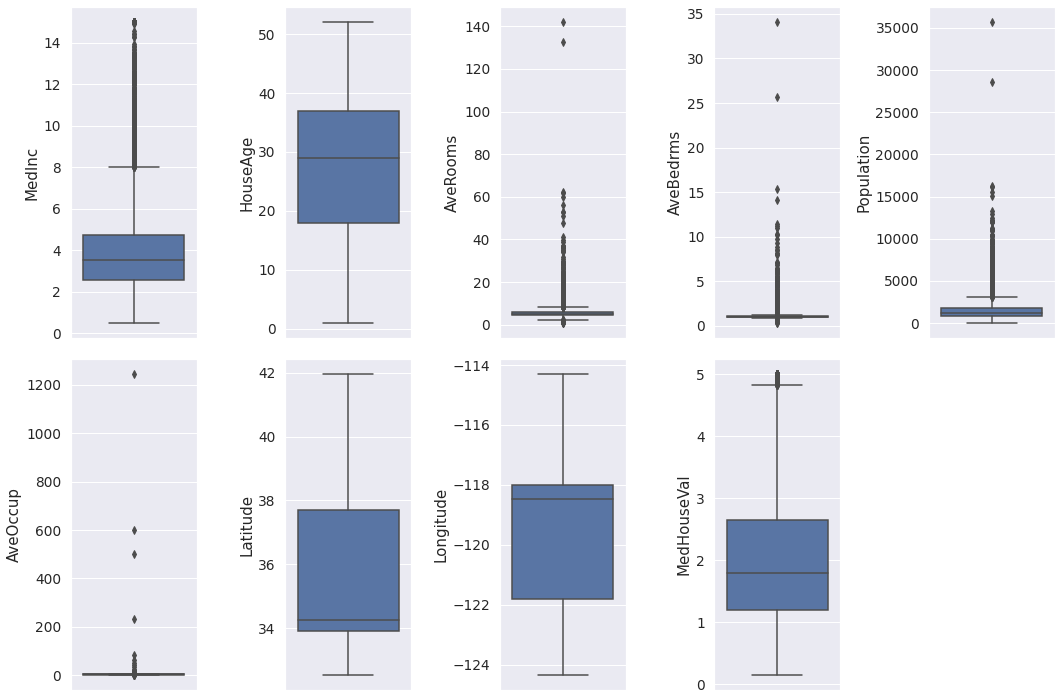

In [14]:
plt.figure(figsize=(15,10))
features = df.columns.tolist()
for i,col in enumerate(features):
  plt.subplot(2,5, i+1)
  sns.boxplot(y=col, data=df, orient='h')
  
plt.tight_layout()
plt.show()

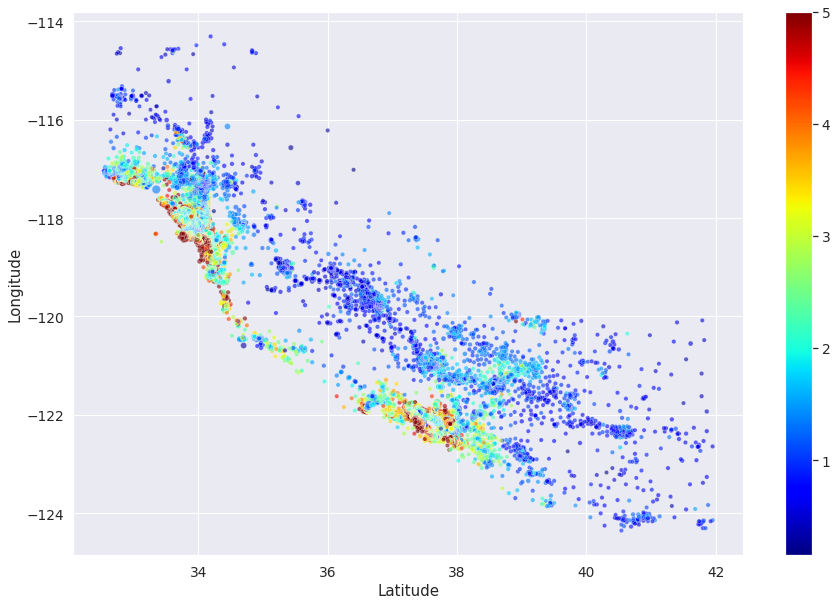

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue ='MedHouseVal', size=df['Population']/100, alpha=.6, palette=plt.get_cmap('jet'))
norm = plt.Normalize(df['MedHouseVal'].min(), df['MedHouseVal'].max())
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

In [16]:
df=df[df['AveRooms']<df['AveRooms'].quantile(0.99)]
df=df[df['AveBedrms']<df['AveBedrms'].quantile(0.99)]
df=df[df['Population']<df['Population'].quantile(0.99)]
df=df[df['AveOccup']<df['AveOccup'].quantile(0.99)]
df=df[df['MedInc']<df['MedInc'].quantile(0.99)]

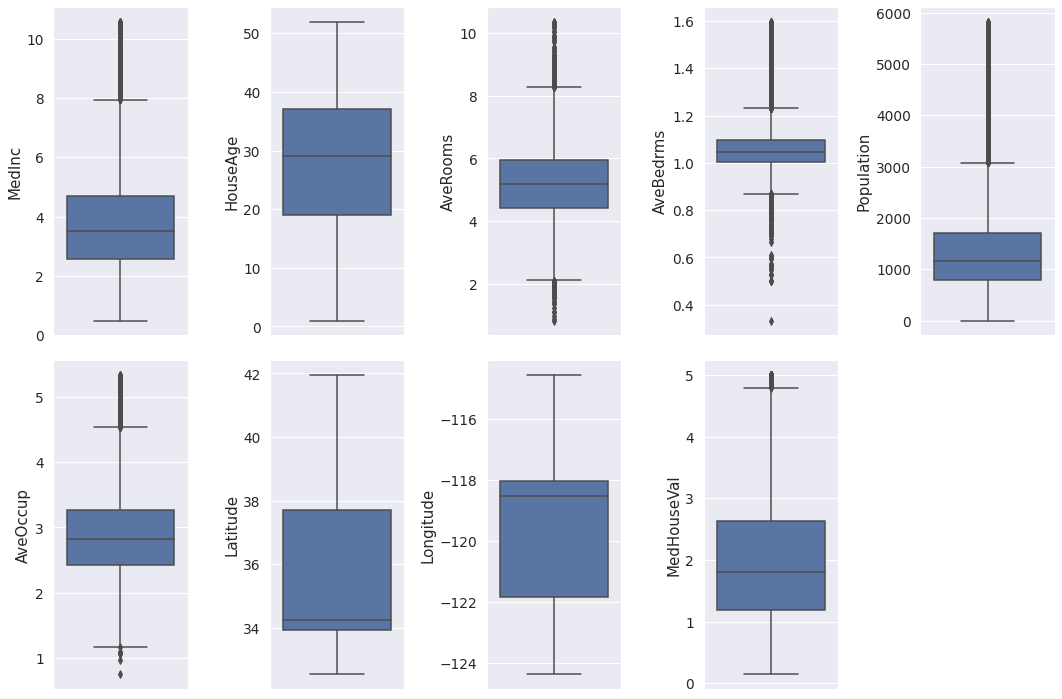

In [17]:
plt.figure(figsize=(15,10))
features = df.columns.tolist()
for i,col in enumerate(features):
  plt.subplot(2,5, i+1)
  sns.boxplot(y=col, data=df, orient='h')
  
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6cd282b50>,
      dtype=object)

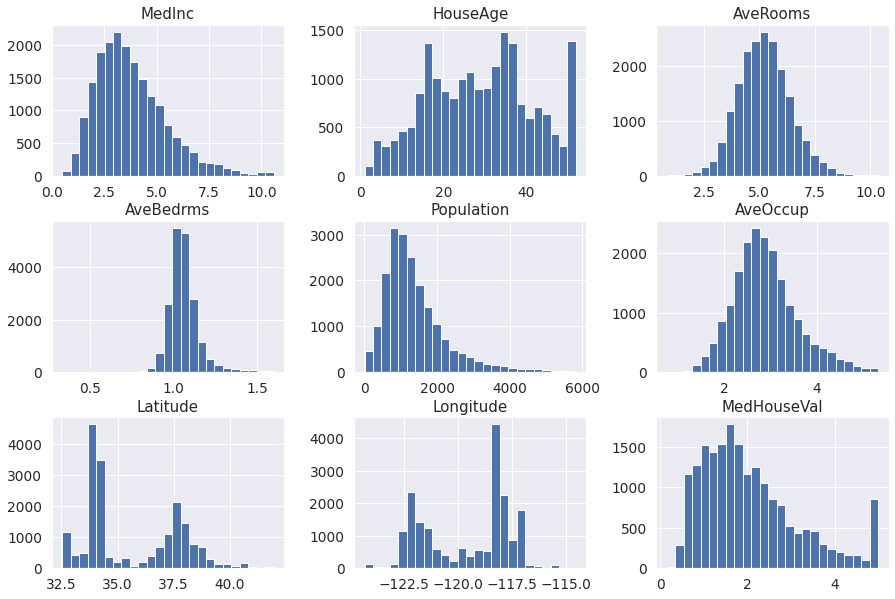

In [19]:
df.hist(bins=25, figsize=(15, 10))

In [31]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

print('R2: ', r2_score(y_test, y_pred))



RMSE:  0.652986336149033
R2:  0.6582613643751134
